In [2]:
import import_ipynb
from Simulations import *

Lets start with one lending pool. The rate is 10%, the principal is 1(doesnt matter). The maturity date is 1 May 2026, and the payment period is 60 days. We assume equal amortization. Will simulate this.

In [3]:
pool_info_array = [] # Initialize the pool info array
pool_info_array.append({"name":"Pool A","principal":1,
               "maturity_date":datetime.date(2026,5,1),"payment_period":60,
                "rate":0.1})
            # Append info for each pool
pool_array = [] # Initialize the pool array
for pool_info in pool_info_array: # Loop over the info and create lending pool objects appendign them to list
    pool_array.append(LendingPool(pool_info))
    
simulation_engine = SimulationEngine(pool_array,np.identity(len(pool_array)))
simulation_engine.simulate_paths(pool_array[0].maturity_date,20000)

We calculate the default probabilties of the first pool, which should come close to 10% (not exactly), but with more paths it should converge to 10%. Then we look at the capital loss distribution for an investment of 100 dollars. The total return we should get is 100 + interest payments, so if in the future the capital loss is more than 1, that is because 100+ interest payments is more than 100, and the payments you didnt get are more than 100.

Default probability of pool A is  0.08965
Initial investment total is  100
10 percentile capital loss is 0.0
25 percentile capital loss is 0.0
50 percentile capital loss is 0.0
75 percentile capital loss is 0.0
99 percentile capital loss is 132.1095890410959
Mean capital loss is  9.605062436914205


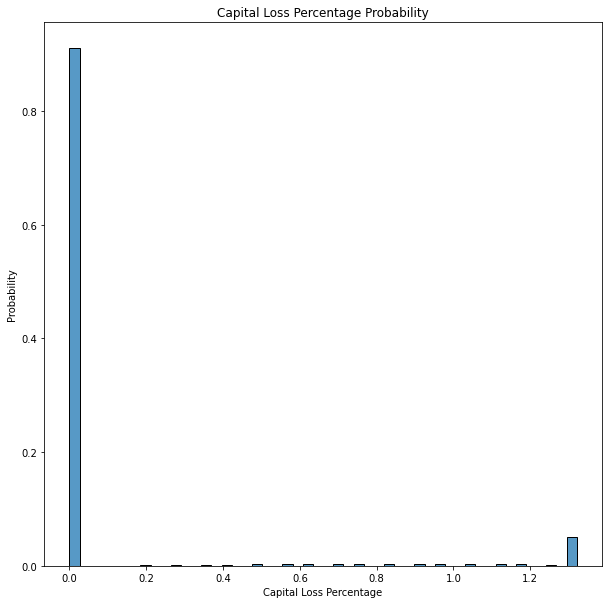

In [4]:
analysis_engine = AnalysisEngine(simulation_engine)
print("Default probability of pool A is ",analysis_engine.default_probabilities_pool()[0])
analysis_engine.visualize_capital_losses([100])

We find that that 10th, 25th, 50th percentile capital loss is 0 and the 99 percentile capital loss is 132 (which corresponds to the case when it defaults at the start). However on most cases the loss is pretty less.

Lets increase the riskiness of the pool, and see how it affects our results. Increasing the rate of the pool to 50%

Default probability of pool A is  0.4649
Initial investment total is  100
10 percentile capital loss is 0.0
25 percentile capital loss is 0.0
50 percentile capital loss is 0.0
75 percentile capital loss is 260.54794520547955
99 percentile capital loss is 260.54794520547955
Mean capital loss is  101.62672602739731


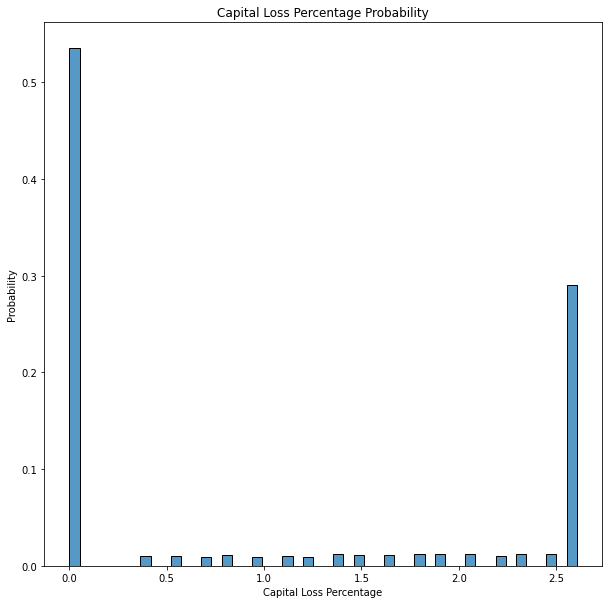

In [5]:
pool_info_array = [] # Initialize the pool info array
pool_info_array.append({"name":"Pool A","principal":1,
               "maturity_date":datetime.date(2026,5,1),"payment_period":60,
                "rate":0.5})
            # Append info for each pool
pool_array = [] # Initialize the pool array
for pool_info in pool_info_array: # Loop over the info and create lending pool objects appendign them to list
    pool_array.append(LendingPool(pool_info))
    
simulation_engine = SimulationEngine(pool_array,np.identity(len(pool_array)))
simulation_engine.simulate_paths(pool_array[0].maturity_date,20000)

analysis_engine = AnalysisEngine(simulation_engine)
print("Default probability of pool A is ",analysis_engine.default_probabilities_pool()[0])
analysis_engine.visualize_capital_losses([100])

We now see that the capital loss distribution shifts to the right, and most percentile values have increased. We want to reduce the 75 and 99 percentile values. Hence for designing pools, we should choose less risky pools.

Now lets try to add an uncorrelated pool with the same riskiness (10%). The 100 dollars will now be equally invested into these (assumign buyer demand is equal)

Default probability of pool A is  0.09255
Default probability of pool  is  0.09255
Initial investment total is  100
10 percentile capital loss is 0.0
25 percentile capital loss is 0.0
50 percentile capital loss is 0.0
75 percentile capital loss is 0.0
99 percentile capital loss is 66.05479452054794
Mean capital loss is  9.706752054794519


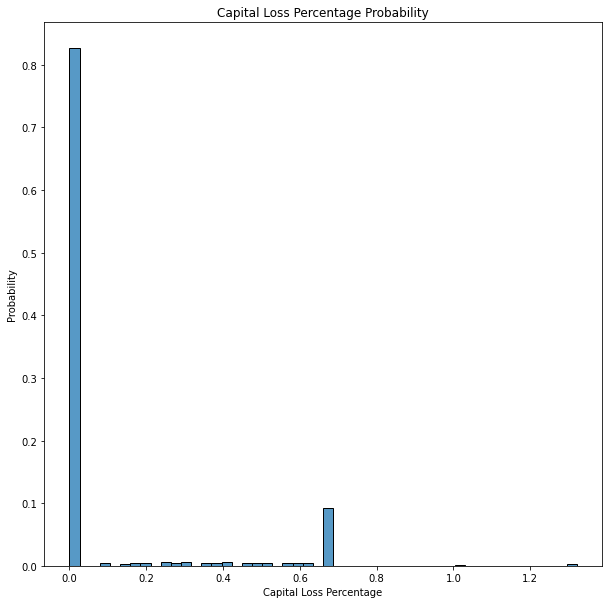

In [7]:
pool_info_array = [] # Initialize the pool info array
pool_info_array.append({"name":"Pool A","principal":1,
               "maturity_date":datetime.date(2026,5,1),"payment_period":60,
                "rate":0.1})
pool_info_array.append({"name":"Pool B","principal":1,
               "maturity_date":datetime.date(2026,5,1),"payment_period":60,
                "rate":0.1})
            # Append info for each pool
pool_array = [] # Initialize the pool array
for pool_info in pool_info_array: # Loop over the info and create lending pool objects appendign them to list
    pool_array.append(LendingPool(pool_info))
    
simulation_engine = SimulationEngine(pool_array,np.identity(len(pool_array)))
simulation_engine.simulate_paths(pool_array[0].maturity_date,20000)

analysis_engine = AnalysisEngine(simulation_engine)
print("Default probability of pool A is ",analysis_engine.default_probabilities_pool()[0])
print("Default probability of pool B is ",analysis_engine.default_probabilities_pool()[1])

analysis_engine.visualize_capital_losses([50,50])

We now see that the 99 percentile loss is less than the case where there was only one pool of 10% risk and all the 100 dollars were invested in it. Hence diversification helps (obvious, but wanted to verify)

Now lets compare two cases - a pool with one lending pool with 10% risk and one with 50% risk but with 0 correlation. And another with the same lending pools but with 1 correlation. 

Default probability of pool A is  0.2789333333333333
Default probability of pool B is  0.46703333333333336
Initial investment total is  100
10 percentile capital loss is 0.0
25 percentile capital loss is 0.0
50 percentile capital loss is 77.49819754866623
75 percentile capital loss is 130.27397260273978
99 percentile capital loss is 228.4383561643837
Mean capital loss is  73.3354397500601


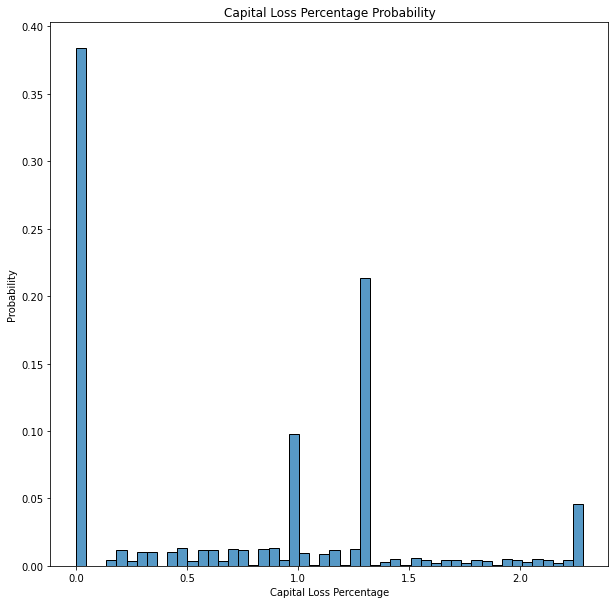

In [10]:
pool_info_array = [] # Initialize the pool info array
pool_info_array.append({"name":"Pool A","principal":1,
               "maturity_date":datetime.date(2026,5,1),"payment_period":60,
                "rate":0.3})
pool_info_array.append({"name":"Pool B","principal":1,
               "maturity_date":datetime.date(2026,5,1),"payment_period":60,
                "rate":0.5})
            # Append info for each pool
pool_array = [] # Initialize the pool array
for pool_info in pool_info_array: # Loop over the info and create lending pool objects appendign them to list
    pool_array.append(LendingPool(pool_info))
    
simulation_engine = SimulationEngine(pool_array,np.identity(len(pool_array)))
simulation_engine.simulate_paths(pool_array[0].maturity_date,30000)

analysis_engine = AnalysisEngine(simulation_engine)
print("Default probability of pool A is ",analysis_engine.default_probabilities_pool()[0])
print("Default probability of pool B is ",analysis_engine.default_probabilities_pool()[1])

analysis_engine.visualize_capital_losses([50,50])

Default probability of pool A is  0.33136666666666664
Default probability of pool B is  0.5066
Initial investment total is  100
10 percentile capital loss is 0.0
25 percentile capital loss is 0.0
50 percentile capital loss is 82.27829848594091
75 percentile capital loss is 130.27397260273978
99 percentile capital loss is 228.4383561643837
Mean capital loss is  81.0232855082913


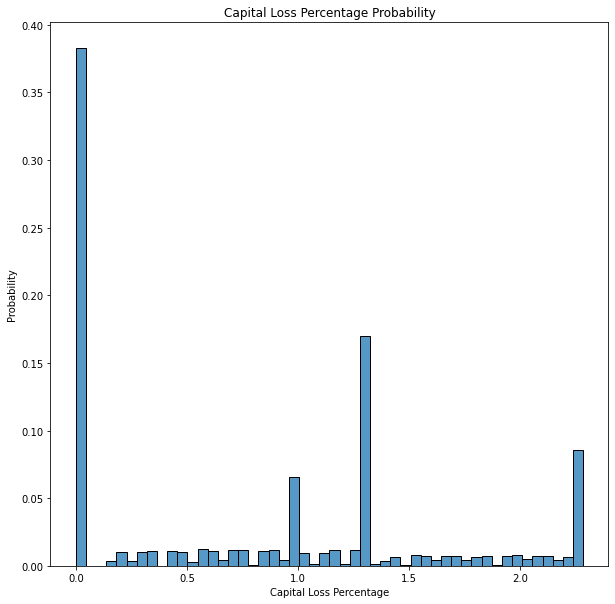

In [12]:
pool_info_array = [] # Initialize the pool info array
pool_info_array.append({"name":"Pool A","principal":1,
               "maturity_date":datetime.date(2026,5,1),"payment_period":60,
                "rate":0.3})
pool_info_array.append({"name":"Pool B","principal":1,
               "maturity_date":datetime.date(2026,5,1),"payment_period":60,
                "rate":0.5})
            # Append info for each pool
pool_array = [] # Initialize the pool array
for pool_info in pool_info_array: # Loop over the info and create lending pool objects appendign them to list
    pool_array.append(LendingPool(pool_info))
    
simulation_engine = SimulationEngine(pool_array,np.array([[1,1],[1,1]]))
simulation_engine.simulate_paths(pool_array[0].maturity_date,30000)

analysis_engine = AnalysisEngine(simulation_engine)
print("Default probability of pool A is ",analysis_engine.default_probabilities_pool()[0])
print("Default probability of pool B is ",analysis_engine.default_probabilities_pool()[1])

analysis_engine.visualize_capital_losses([50,50])

We see that the presence of a correlated other pool increases the probability of default for both pools, and increases the median loss (the 75th and 99th percentile loss were already maxed out). Also observe on the graph that rightmost bar on the x-axis has increased, indicating that the distribution has shifted to the right. Hence having uncorrelated pools is better.

So from a high view, addinng new pools to Carapace pool should decrease risk. Decreasing risk means one of various things - the distribution of capital loss shifts to the left, and the values on right tail decrease. The percentile values (median, 75th or 99th) decrease. So for testing which pool is more diversified, one can construct both of them and look at the capital loss distribution. Lets try this exercise

Consider Carapace pool 1 - it has 5 lending pools of risks [30,30,30,30,30] all of which are uncorrelated. 
Carapace pool 2 - it has 5 lending pools of risks [20,20,20,20,20] however all of them are fully correlated. Lets see which pool is less risky. We invest 100 dollars into both assuming equal protection buyer demand.

Default probability of pool A is  0.27662
Default probability of pool B is  0.27524
Default probability of pool C is  0.28042
Default probability of pool D is  0.27938
Default probability of pool E is  0.27768
Initial investment total is  100
10 percentile capital loss is 0.0
25 percentile capital loss is 16.532948810382138
50 percentile capital loss is 39.26575342465755
75 percentile capital loss is 72.33165104542181
99 percentile capital loss is 136.39682768565254
Mean capital loss is  44.64503764671956


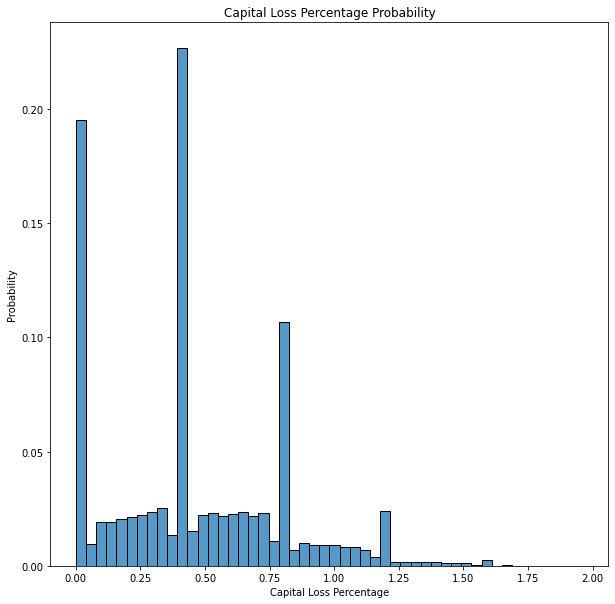

In [13]:
pool_info_array = [] # Initialize the pool info array
pool_info_array.append({"name":"Pool A","principal":1,
               "maturity_date":datetime.date(2026,5,1),"payment_period":60,
                "rate":0.3})
pool_info_array.append({"name":"Pool B","principal":1,
               "maturity_date":datetime.date(2026,5,1),"payment_period":60,
                "rate":0.3})
pool_info_array.append({"name":"Pool C","principal":1,
               "maturity_date":datetime.date(2026,5,1),"payment_period":60,
                "rate":0.3})
pool_info_array.append({"name":"Pool D","principal":1,
               "maturity_date":datetime.date(2026,5,1),"payment_period":60,
                "rate":0.3})
pool_info_array.append({"name":"Pool E","principal":1,
               "maturity_date":datetime.date(2026,5,1),"payment_period":60,
                "rate":0.3})
            # Append info for each pool
pool_array = [] # Initialize the pool array
for pool_info in pool_info_array: # Loop over the info and create lending pool objects appendign them to list
    pool_array.append(LendingPool(pool_info))
    
simulation_engine = SimulationEngine(pool_array,np.identity(len(pool_array)))
simulation_engine.simulate_paths(pool_array[0].maturity_date,30000)

analysis_engine = AnalysisEngine(simulation_engine)
print("Default probability of pool A is ",analysis_engine.default_probabilities_pool()[0])
print("Default probability of pool B is ",analysis_engine.default_probabilities_pool()[1])
print("Default probability of pool C is ",analysis_engine.default_probabilities_pool()[2])
print("Default probability of pool D is ",analysis_engine.default_probabilities_pool()[3])
print("Default probability of pool E is ",analysis_engine.default_probabilities_pool()[4])


analysis_engine.visualize_capital_losses([20,20,20,20,20])

Default probability of pool A is  0.3695
Default probability of pool B is  0.3678
Default probability of pool C is  0.37233333333333335
Default probability of pool D is  0.3690333333333333
Default probability of pool E is  0.36583333333333334
Initial investment total is  100
10 percentile capital loss is 0.0
25 percentile capital loss is 0.0
50 percentile capital loss is 36.05479452054794
75 percentile capital loss is 79.70007209805334
99 percentile capital loss is 180.2739726027397
Mean capital loss is  50.957189906272525


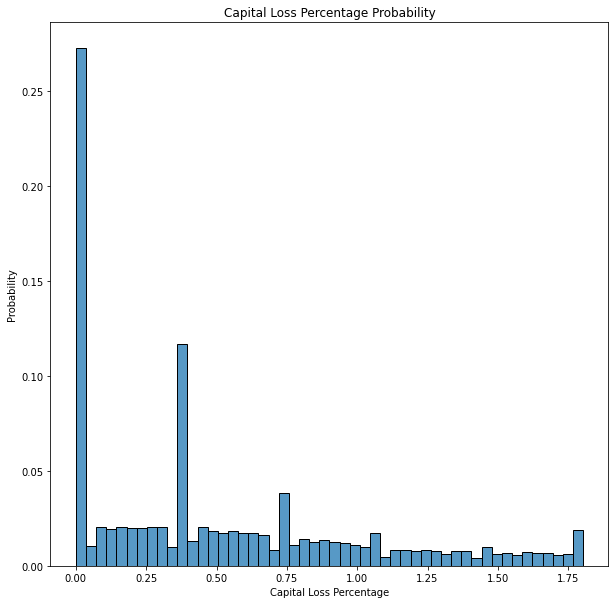

In [15]:
pool_info_array = [] # Initialize the pool info array
pool_info_array.append({"name":"Pool A","principal":1,
               "maturity_date":datetime.date(2026,5,1),"payment_period":60,
                "rate":0.25})
pool_info_array.append({"name":"Pool B","principal":1,
               "maturity_date":datetime.date(2026,5,1),"payment_period":60,
                "rate":0.25})
pool_info_array.append({"name":"Pool C","principal":1,
               "maturity_date":datetime.date(2026,5,1),"payment_period":60,
                "rate":0.25})
pool_info_array.append({"name":"Pool D","principal":1,
               "maturity_date":datetime.date(2026,5,1),"payment_period":60,
                "rate":0.25})
pool_info_array.append({"name":"Pool E","principal":1,
               "maturity_date":datetime.date(2026,5,1),"payment_period":60,
                "rate":0.25})
            # Append info for each pool
pool_array = [] # Initialize the pool array
for pool_info in pool_info_array: # Loop over the info and create lending pool objects appendign them to list
    pool_array.append(LendingPool(pool_info))
    
simulation_engine = SimulationEngine(pool_array,np.ones((len(pool_array),len(pool_array))))
simulation_engine.simulate_paths(pool_array[0].maturity_date,30000)

analysis_engine = AnalysisEngine(simulation_engine)
print("Default probability of pool A is ",analysis_engine.default_probabilities_pool()[0])
print("Default probability of pool B is ",analysis_engine.default_probabilities_pool()[1])
print("Default probability of pool C is ",analysis_engine.default_probabilities_pool()[2])
print("Default probability of pool D is ",analysis_engine.default_probabilities_pool()[3])
print("Default probability of pool E is ",analysis_engine.default_probabilities_pool()[4])


analysis_engine.visualize_capital_losses([20,20,20,20,20])

We find that both 99 percentile capital loss and mean capital loss are higher for the pools with seemingly less risk yet more correlation i.e pool 2. Pool 1 with all pools individually more risk (30%) is less risky than pool 2 with all pools individually less risky (25%) but more correlated.

Lets also compare with a pool 3 which has 5 lending pools with 25% risk but with 0.5 correlation between all of them

Default probability of pool A is  0.28476666666666667
Default probability of pool B is  0.293
Default probability of pool C is  0.28633333333333333
Default probability of pool D is  0.2868
Default probability of pool E is  0.2915333333333333
Initial investment total is  100
10 percentile capital loss is 0.0
25 percentile capital loss is 0.0
50 percentile capital loss is 36.05479452054794
75 percentile capital loss is 68.31434751261713
99 percentile capital loss is 151.8096611391492
Mean capital loss is  41.02921759192501


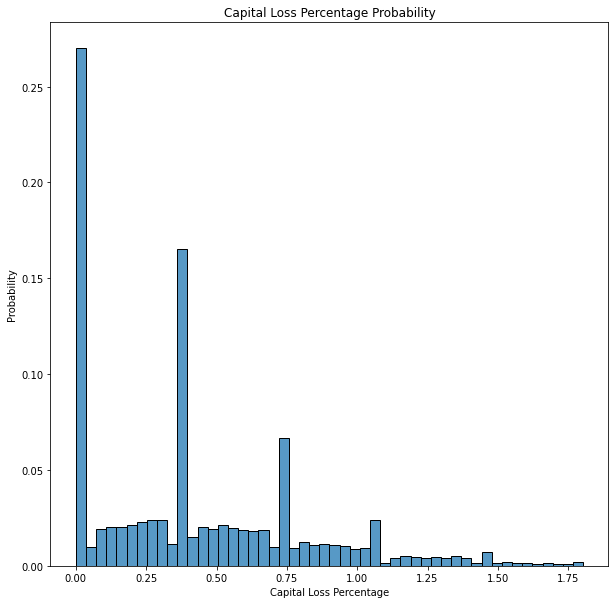

In [16]:
pool_info_array = [] # Initialize the pool info array
pool_info_array.append({"name":"Pool A","principal":1,
               "maturity_date":datetime.date(2026,5,1),"payment_period":60,
                "rate":0.25})
pool_info_array.append({"name":"Pool B","principal":1,
               "maturity_date":datetime.date(2026,5,1),"payment_period":60,
                "rate":0.25})
pool_info_array.append({"name":"Pool C","principal":1,
               "maturity_date":datetime.date(2026,5,1),"payment_period":60,
                "rate":0.25})
pool_info_array.append({"name":"Pool D","principal":1,
               "maturity_date":datetime.date(2026,5,1),"payment_period":60,
                "rate":0.25})
pool_info_array.append({"name":"Pool E","principal":1,
               "maturity_date":datetime.date(2026,5,1),"payment_period":60,
                "rate":0.25})
            # Append info for each pool
pool_array = [] # Initialize the pool array
for pool_info in pool_info_array: # Loop over the info and create lending pool objects appendign them to list
    pool_array.append(LendingPool(pool_info))

corr_matrix = 0.5*np.ones((len(pool_array),len(pool_array)))
np.fill_diagonal(corr_matrix,1)
simulation_engine = SimulationEngine(pool_array,corr_matrix)
simulation_engine.simulate_paths(pool_array[0].maturity_date,30000)

analysis_engine = AnalysisEngine(simulation_engine)
print("Default probability of pool A is ",analysis_engine.default_probabilities_pool()[0])
print("Default probability of pool B is ",analysis_engine.default_probabilities_pool()[1])
print("Default probability of pool C is ",analysis_engine.default_probabilities_pool()[2])
print("Default probability of pool D is ",analysis_engine.default_probabilities_pool()[3])
print("Default probability of pool E is ",analysis_engine.default_probabilities_pool()[4])


analysis_engine.visualize_capital_losses([20,20,20,20,20])

We find that this is also more riskier than the 30% pool with no correlation. However both the 99 percentile capital and 75 percentile capital loss is less than 25% pool with 1 correlation, indicating that our model is monotonic with correlation.

Lets illustrate a tricky thing now - clusters. Imagine a carapace pool 1 with 3 lending pools, where all 3 pools are correlated 0.5. And lets compare this with carapace pool 2 where the first lending pool is uncorrelated, and the second and the third lending pool are correlated fully - 1. 

Default probability of pool A is  0.2517333333333333
Default probability of pool B is  0.25056666666666666
Default probability of pool C is  0.2474
Initial investment total is  99.89999999999999
10 percentile capital loss is 0.0
25 percentile capital loss is 0.0
50 percentile capital loss is 18.957231434751254
75 percentile capital loss is 60.031232876712316
99 percentile capital loss is 167.45554434030277
Mean capital loss is  36.20799608651765


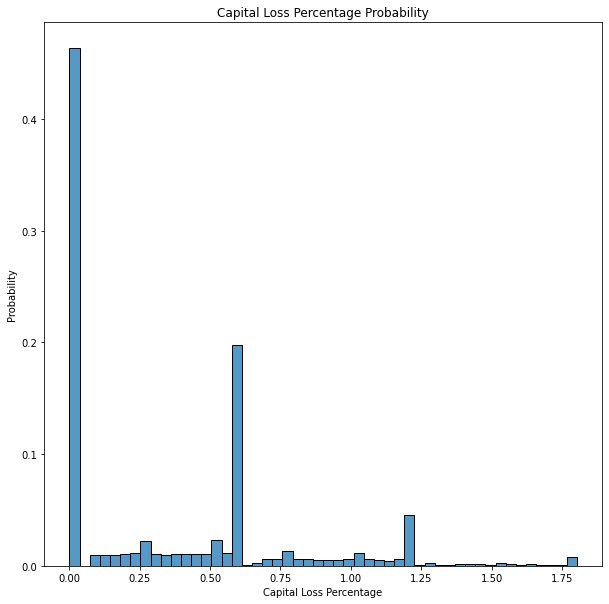

In [17]:
pool_info_array = [] # Initialize the pool info array
pool_info_array.append({"name":"Pool A","principal":1,
               "maturity_date":datetime.date(2026,5,1),"payment_period":60,
                "rate":0.25})
pool_info_array.append({"name":"Pool B","principal":1,
               "maturity_date":datetime.date(2026,5,1),"payment_period":60,
                "rate":0.25})
pool_info_array.append({"name":"Pool C","principal":1,
               "maturity_date":datetime.date(2026,5,1),"payment_period":60,
                "rate":0.25})
            # Append info for each pool
pool_array = [] # Initialize the pool array
for pool_info in pool_info_array: # Loop over the info and create lending pool objects appendign them to list
    pool_array.append(LendingPool(pool_info))
    
corr_matrix = 0.5*np.ones((len(pool_array),len(pool_array)))
np.fill_diagonal(corr_matrix,1)
    
simulation_engine = SimulationEngine(pool_array,corr_matrix)
simulation_engine.simulate_paths(pool_array[0].maturity_date,30000)

analysis_engine = AnalysisEngine(simulation_engine)
print("Default probability of pool A is ",analysis_engine.default_probabilities_pool()[0])
print("Default probability of pool B is ",analysis_engine.default_probabilities_pool()[1])
print("Default probability of pool C is ",analysis_engine.default_probabilities_pool()[2])


analysis_engine.visualize_capital_losses([33.3,33.3,33.3])

Default probability of pool A is  0.22796666666666668
Default probability of pool B is  0.2546
Default probability of pool C is  0.25453333333333333
Initial investment total is  99.89999999999999
10 percentile capital loss is 0.0
25 percentile capital loss is 0.0
50 percentile capital loss is 22.116770007209798
75 percentile capital loss is 60.031232876712316
99 percentile capital loss is 151.65785147801006
Mean capital loss is  35.76618727613554


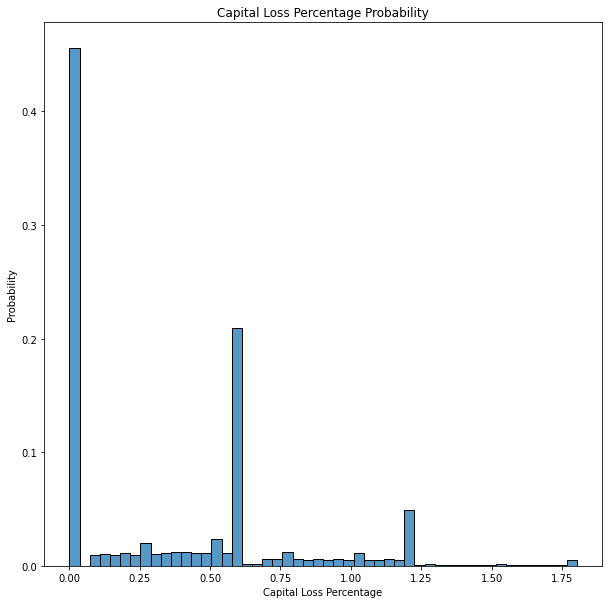

In [18]:
pool_info_array = [] # Initialize the pool info array
pool_info_array.append({"name":"Pool A","principal":1,
               "maturity_date":datetime.date(2026,5,1),"payment_period":60,
                "rate":0.25})
pool_info_array.append({"name":"Pool B","principal":1,
               "maturity_date":datetime.date(2026,5,1),"payment_period":60,
                "rate":0.25})
pool_info_array.append({"name":"Pool C","principal":1,
               "maturity_date":datetime.date(2026,5,1),"payment_period":60,
                "rate":0.25})
            # Append info for each pool
pool_array = [] # Initialize the pool array
for pool_info in pool_info_array: # Loop over the info and create lending pool objects appendign them to list
    pool_array.append(LendingPool(pool_info))
    
corr_matrix = np.ones((len(pool_array),len(pool_array)))
corr_matrix[0][1] = 0
corr_matrix[0][2] = 0
corr_matrix[2][0] = 0
corr_matrix[1][0] = 0
    
simulation_engine = SimulationEngine(pool_array,corr_matrix)
simulation_engine.simulate_paths(pool_array[0].maturity_date,30000)

analysis_engine = AnalysisEngine(simulation_engine)
print("Default probability of pool A is ",analysis_engine.default_probabilities_pool()[0])
print("Default probability of pool B is ",analysis_engine.default_probabilities_pool()[1])
print("Default probability of pool C is ",analysis_engine.default_probabilities_pool()[2])


analysis_engine.visualize_capital_losses([33.3,33.3,33.3])

It seems both of the pools have similar numbers even though the 99 percentile loss is higher for the pool where all are correlated 0.5. However till now we have assumed that the protection buyer demand is equal. In the case when the protection buyer demand is equally distributed in the two correlated lending pools, the capital distribution will change, because now protection sellers money is effectively going into those two pools. Lets get the new numbers now

Initial investment total is  100
10 percentile capital loss is 0.0
25 percentile capital loss is 0.0
50 percentile capital loss is 0.0
75 percentile capital loss is 90.13698630136984
99 percentile capital loss is 180.2739726027397
Mean capital loss is  36.912360970920446


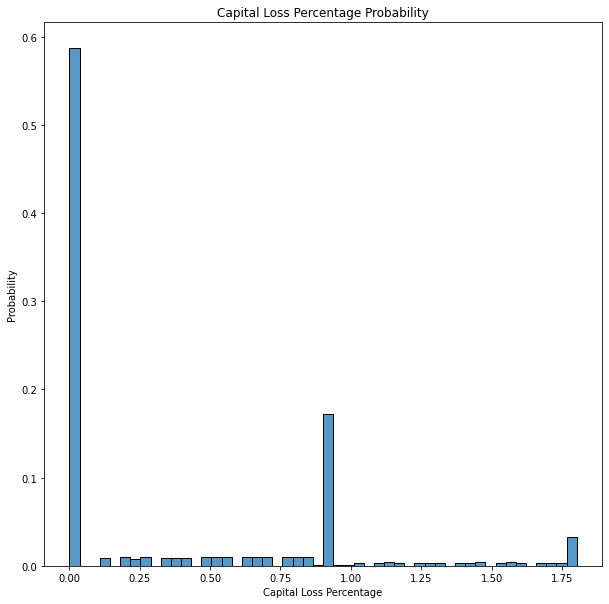

In [20]:
analysis_engine = AnalysisEngine(simulation_engine)
analysis_engine.visualize_capital_losses([0,50,50]) # 50 percent allocated to last two pools

We see now that 99 percentile capital loss and other metrics rise a lot. This shows how in pool design you should identify clusters of correlated pools and change the pool design based on buyer demand. Hence from a protection sellers pov, our model also take the protection buyer into account.

### Final comments

I have showed a lot of example proving how the simulations take various factors into account. Of course there are various other factors - financing rate, loan maturity, loan amortization which can be studied in the context of our simulations. However the underlying simulations does model everything in a sensible manner, and it is a good tool to get which Carapace pool is risky, particularly in tricky situations which I illustrated above. I will make some final points to keep into account

1. Our code doesnt model the exact default probabilities i.e it implies a risk factor based on the financing rate based on the Carapace formula, and because we use Poisson distribution, the probability of survival is exactly the financign rate. Of course in the real world this might not be a correct estimate. However I am confident that as long as we preserve the order of riskiness, we will still get correct comparisons. This means that if we know in the real world a lending pool A is more riskier than lending pool B, as long as our implied risk factors also follow that relation (which they do), the results we get by comparing a Carapace pool with lending pool A, and then replacing that with lending pool B should show us that the first Carapace pool is riskier.

2. Again the absolute 99 percentile capital loss are not what they will be in real world. Real world loans are bullet i.e they pay interest and then pay most of the principal on one payment date which is not known in advance. WE currently model equal payments on all days, but again the ordering of capital loss percentages should follow real world ordering. The idea behind these simulations is to see addition of which pools make it more risky, and can we compare a cluster of pools A and cluster of pools B. THe equal amortization idea does preserve the ordering, and is suitable for us. In the future we can model more complicated payment logic, as long as is it is known in advance. 

3. Modelling the initial investment based on protection buyer demand is important as I showed in the last example.

4. I am not able to come up with a criteria yet for what 99 percentile capital loss should you allow a Carapace pool to exist. For that I would need lots of constituent loans I can play around with and construct different combinations, where currently I only have 8. However of course you can order combinations based on riskiness using these simulations

5. The more better our correlation models are, the more our simulations will represent real life. And the more accurately you model interest payments, the more they will come to real world. However as I have a two week deadline, this is the maximum I can do. Building credit models is an ongoing task.

6. In the absence of good correlation numbers, it is always better to overestimate rather underestimate.

7. In real world when a loan defaults, not the entire principal is lost, you are able to recover some amount of it, which is modelled by the recovery amount in various financial institutions (Goldman included). Our equal amortization assumption for a bullet loan is a good approximation for that.